In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [31]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The dataset has {df.isnull().sum().sum()} missing values')
print(f'The dataset has {df.duplicated().sum()} duplicated rows')

The dataset contains 74051 rows and 10 columns
The dataset has 0 missing values
The dataset has 0 duplicated rows


In [32]:
# Most numerical columns have too many decimal places, we should round them to 2 decimal places
for col in df.select_dtypes('float64').columns:
    df[col] = df[col].round(2)

df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.52,1.18,0.38,28.97,12.73,6.65,8.35,9
1,1,I,1.10,0.82,0.28,10.42,4.52,2.32,3.40,8
2,2,M,1.39,1.11,0.38,24.78,11.34,5.56,6.66,9
3,3,F,1.70,1.41,0.50,50.66,20.35,10.99,15.00,11
4,4,I,1.25,1.01,0.34,23.29,11.98,4.51,5.95,8


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


## Sex count

In [5]:
df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

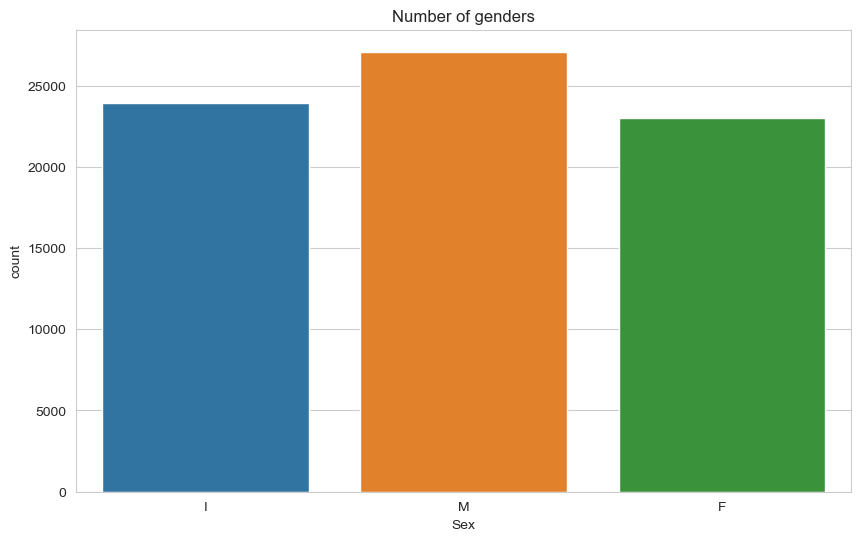

In [6]:
# Number of genders
plt.figure(figsize=(10, 6))

sns.countplot(x='Sex', data=df)
plt.title('Number of genders')
plt.show();

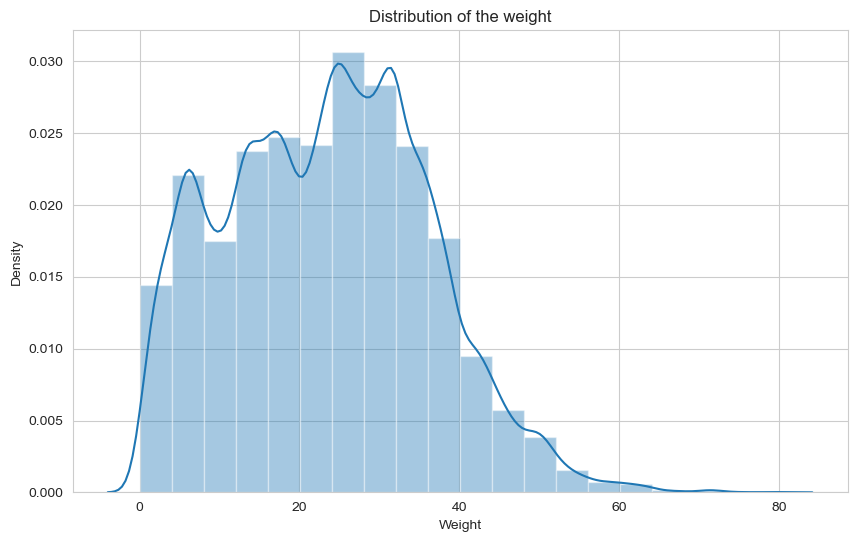

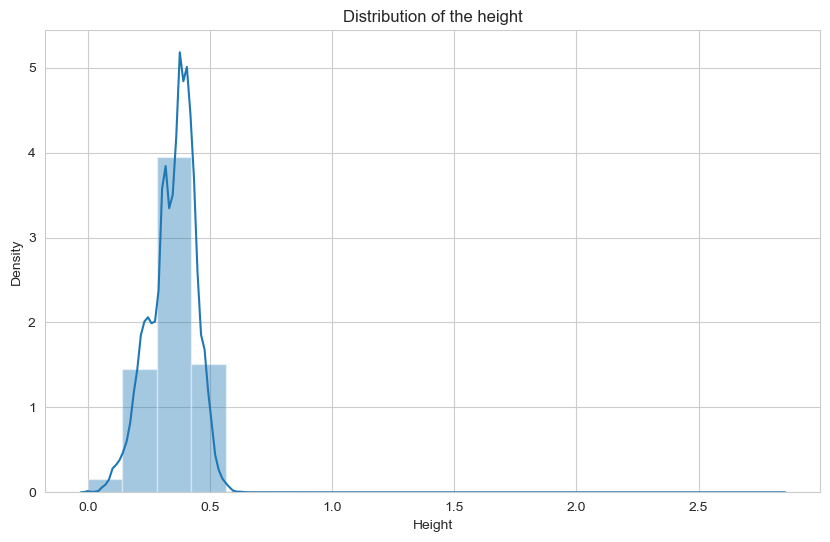

In [8]:
# Distribution of the weight
plt.figure(figsize=(10, 6))
sns.distplot(df['Weight'], bins=20)
plt.title('Distribution of the weight')
plt.show()

# Distribution of the height
plt.figure(figsize=(10, 6))
sns.distplot(df['Height'], bins=20)
plt.title('Distribution of the height')
plt.show();

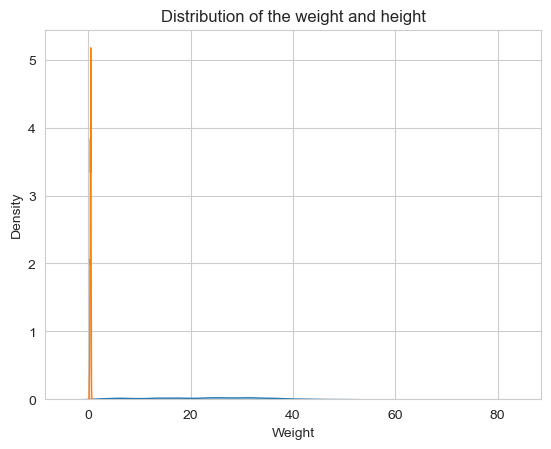

In [11]:
sns.kdeplot(df['Weight'], shade=True, cmap='Blues', shade_lowest=False) 
sns.kdeplot(df['Height'], shade=True, cmap='Reds', shade_lowest=False)
plt.title('Distribution of the weight and height');


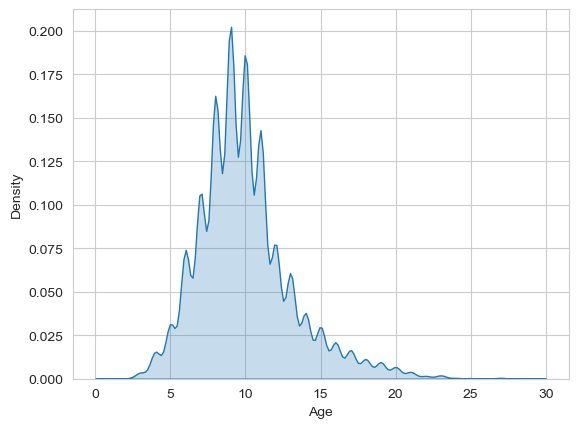

In [13]:
sns.kdeplot(df['Age'], shade=True, cmap='Accent', shade_lowest=False);

In [14]:
# df describe difference id and sex
df.select_dtypes(include='number').describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,74051.000000,37025.000000,21376.826729,0.000000,18512.500000,37025.000000,55537.500000,74050.000000
Length,74051.000000,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.000000,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.000000,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.000000,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.000000,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.000000,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.000000,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.000000,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


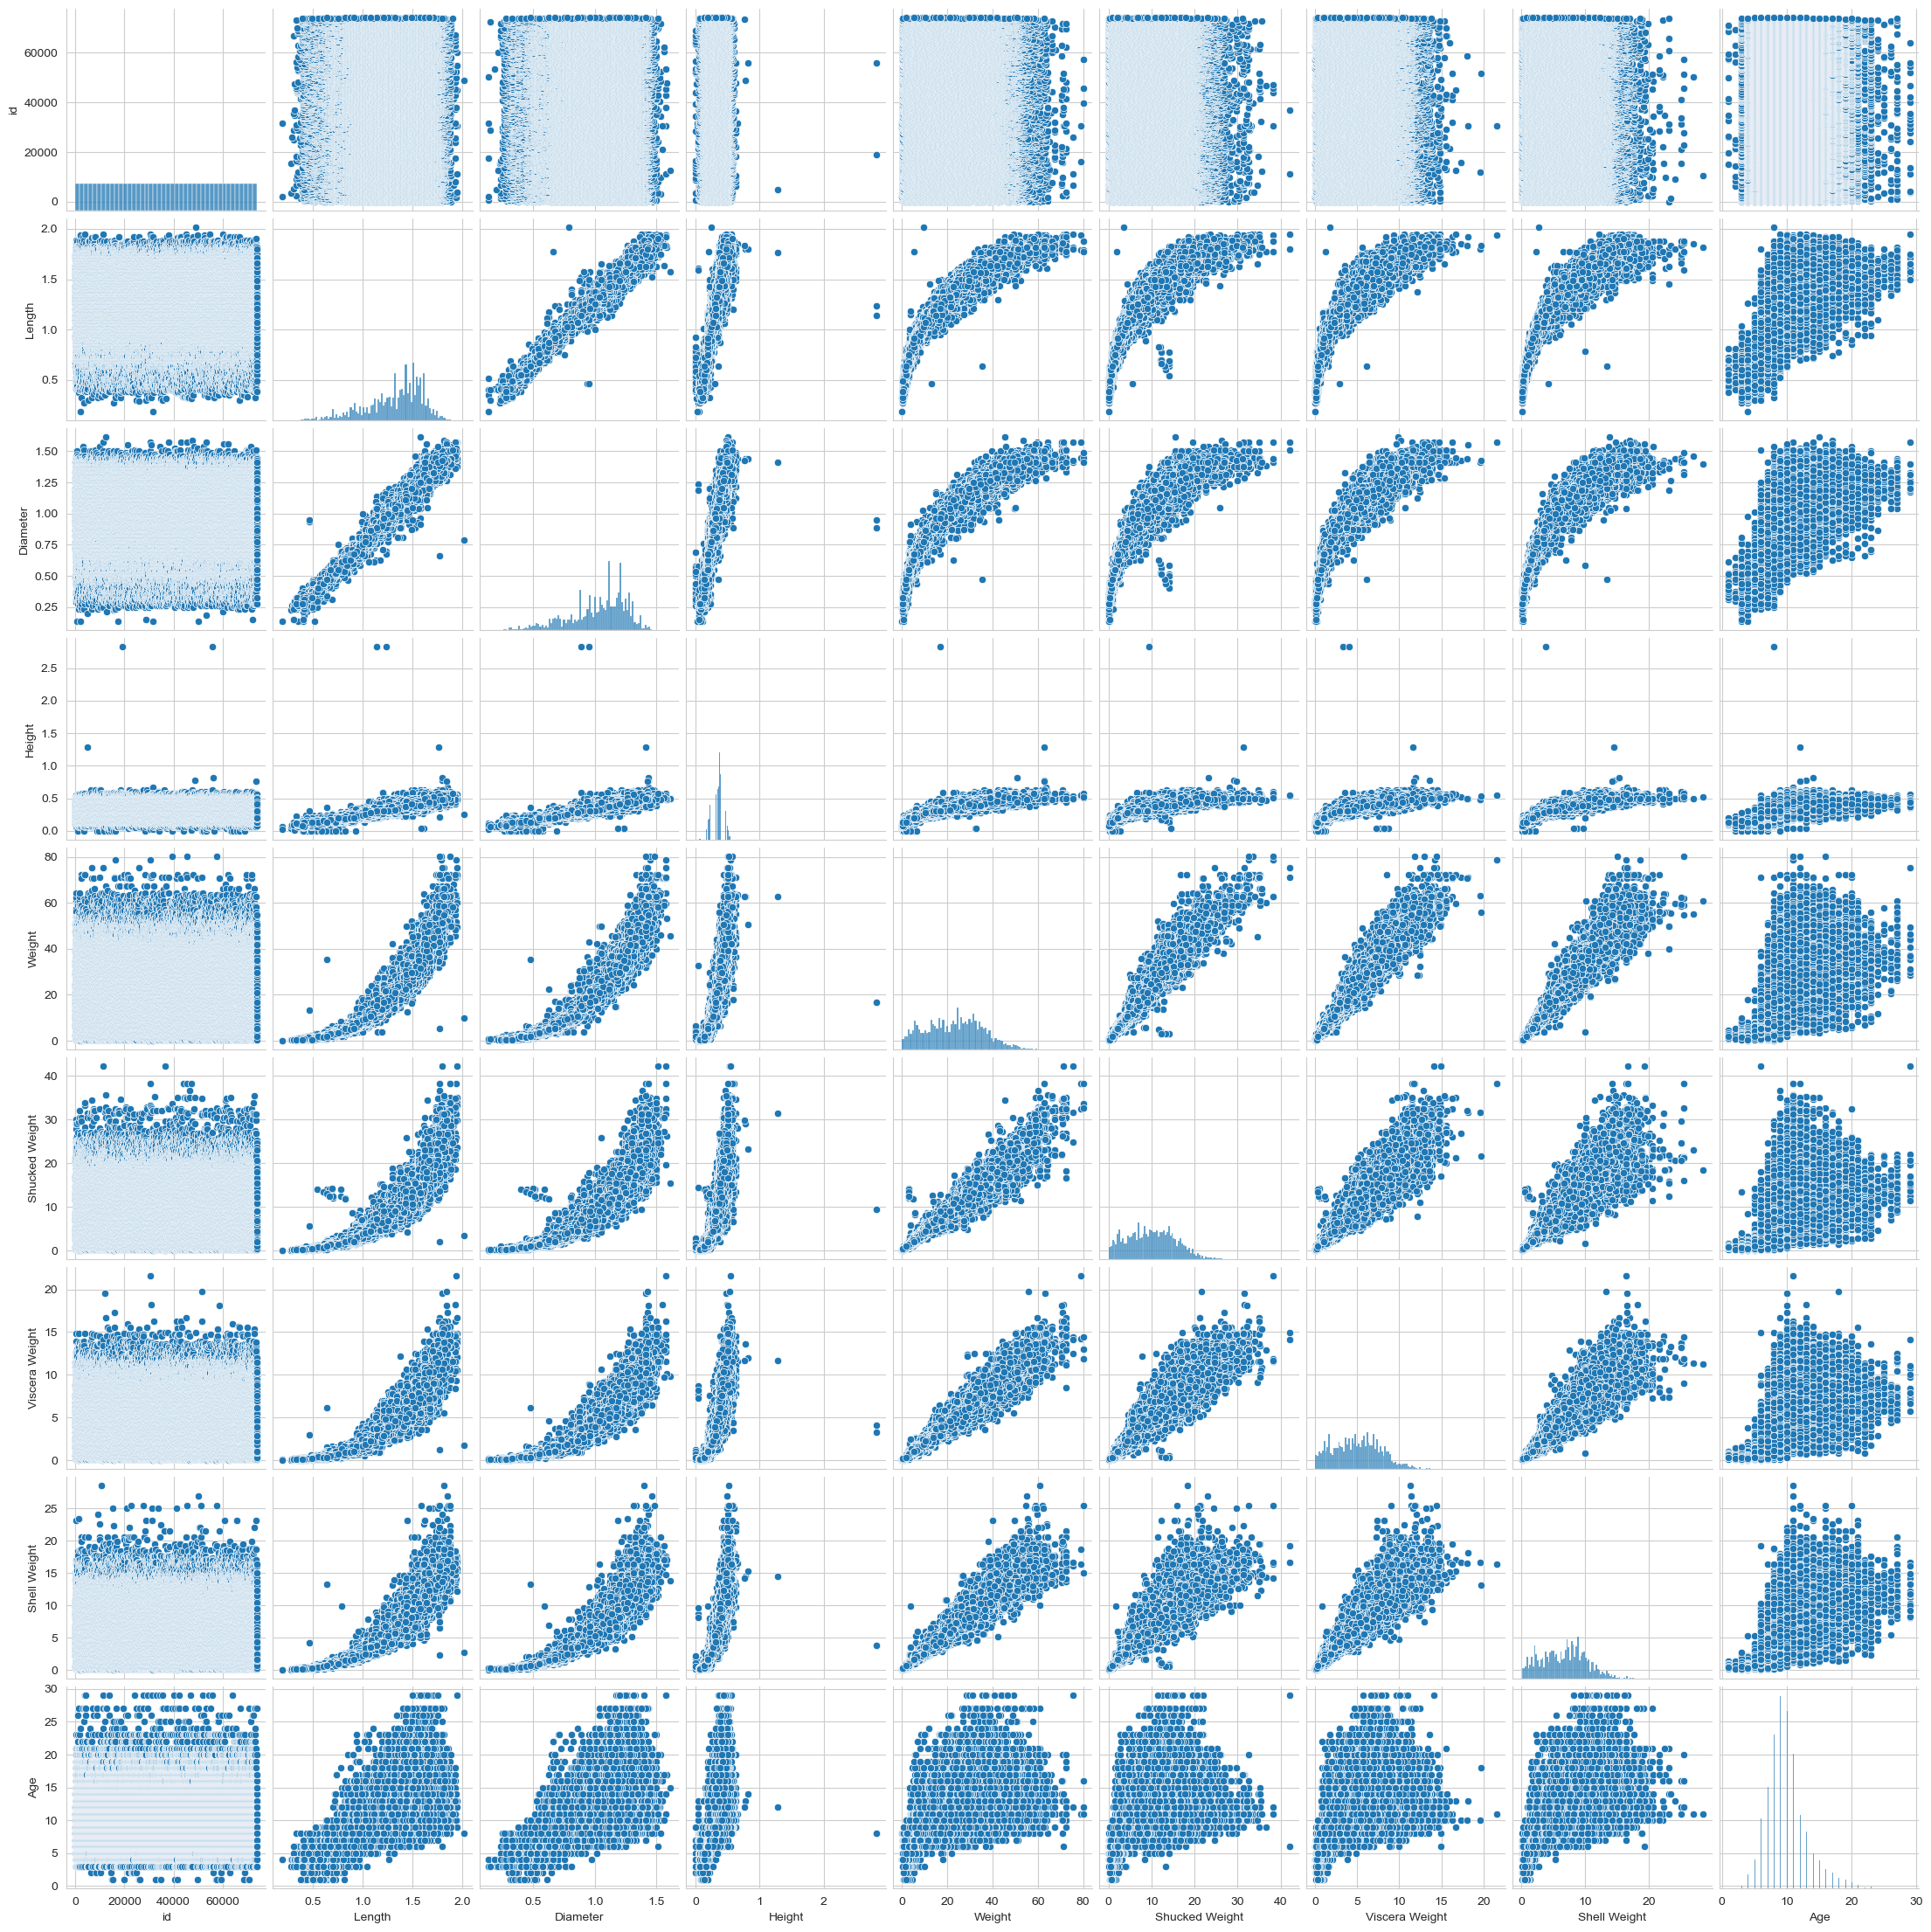

In [15]:
# Pairplot
sns.pairplot(df, palette='viridis');

# Feature Engineering
* We can gain the following features:
- BMI:  weight(kg)/height(m)^2

In [16]:
# Create a new feature called BMI (Body Mass Index)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,BMI
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,206.031566
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,137.764512
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,176.195292
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,202.642226
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,204.458617


# Modeling

In [33]:
# Correlaton with target
df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663470
Height            0.637963
Diameter          0.621128
Length            0.612761
Weight            0.601194
Viscera Weight    0.576807
Shucked Weight    0.503320
id                0.000089
Name: Age, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.6+ MB


In [34]:
# Improving correlation with target
df['Length'] = np.log(df['Length'])
df['Diameter'] = np.log(df['Diameter'])
df['Height'] = np.log(df['Height'])
df['Weight'] = np.log(df['Weight'])
df['Shell Weight'] = np.log(df['Shell Weight'])
df['Viscera Weight'] = np.log(df['Viscera Weight'])
df['Age'] = np.log(df['Age'])

df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.763554
Height            0.735619
Weight            0.735367
Diameter          0.727429
Viscera Weight    0.725353
Length            0.721895
Shucked Weight    0.579257
id                0.000324
Name: Age, dtype: float64

In [15]:
# np.sqrt
df['Length'] = np.sqrt(df['Length'])
df['Diameter'] = np.sqrt(df['Diameter'])
df['Height'] = np.sqrt(df['Height'])
df['Weight'] = np.sqrt(df['Weight'])
df['Shell Weight'] = np.sqrt(df['Shell Weight'])
df['Viscera Weight'] = np.sqrt(df['Viscera Weight'])
df['Age'] = np.sqrt(df['Age'])

df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.756700
Diameter          0.731398
Height            0.730570
Length            0.726266
Weight            0.723215
Viscera Weight    0.709774
Shucked Weight    0.573423
id               -0.000181
Name: Age, dtype: float64

In [14]:
# np.square
df['Length'] = np.square(df['Length'])
df['Diameter'] = np.square(df['Diameter'])
df['Height'] = np.square(df['Height'])
df['Weight'] = np.square(df['Weight'])
df['Shell Weight'] = np.square(df['Shell Weight'])
df['Viscera Weight'] = np.square(df['Viscera Weight'])
df['Age'] = np.square(df['Age'])

df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.746350
Height            0.737310
Diameter          0.734107
Length            0.728306
Weight            0.703317
Viscera Weight    0.685762
Shucked Weight    0.583749
id                0.000256
Name: Age, dtype: float64

In [35]:
# Get the high correlated features with over 0.5
corr = df.select_dtypes(include='number').corr()
high_corr_features = corr.index[abs(corr['Age']) > 0.5]
high_corr_features

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [36]:
# Drop the target column
high_corr_features = high_corr_features.drop('Age')
high_corr_features

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [13]:
# Cubic root
df['Length'] = np.cbrt(df['Length'])
df['Diameter'] = np.cbrt(df['Diameter'])
df['Height'] = np.cbrt(df['Height'])
df['Weight'] = np.cbrt(df['Weight'])
df['Shell Weight'] = np.cbrt(df['Shell Weight'])
df['Viscera Weight'] = np.cbrt(df['Viscera Weight'])
df['Age'] = np.cbrt(df['Age'])

df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.756700
Diameter          0.731398
Height            0.730570
Length            0.726266
Weight            0.723215
Viscera Weight    0.709774
Shucked Weight    0.573423
id               -0.000181
Name: Age, dtype: float64

MSE: 0.03646011530310431
MAE: 0.14192701867754565
R2: 0.6375725521923429


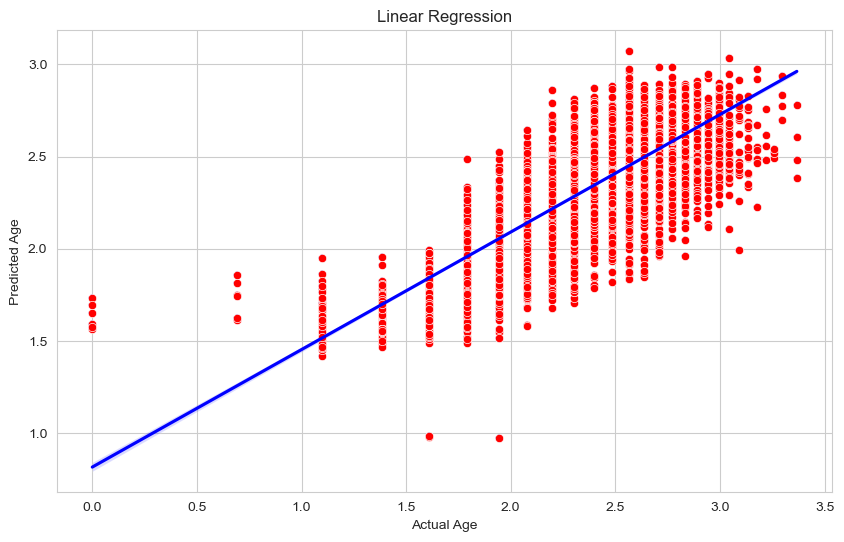

In [37]:
Target = df['Age']
Features = df[high_corr_features]

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Features = Features.apply(le.fit_transform)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

# Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_y_pred = lr.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test, lr_y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, lr_y_pred)}')
print(f'R2: {r2_score(y_test, lr_y_pred)}')

# Visualize
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=lr_y_pred, color='blue', marker='+') # Regression line
sns.scatterplot(x=y_test, y=lr_y_pred, color='red') # Scatter plot
plt.title('Linear Regression')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show();

MSE: 0.03547346066713295
MAE: 0.14075931420484408
R2: 0.6473802754705039


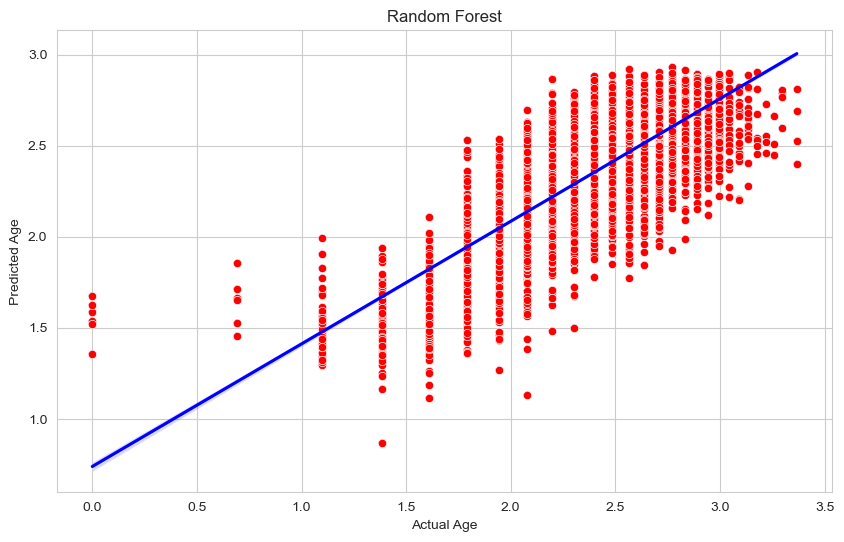

In [38]:
# RF
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict
rf_y_pred = rf.predict(X_test)

# Evaluation
print(f'MSE: {mean_squared_error(y_test, rf_y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, rf_y_pred)}')
print(f'R2: {r2_score(y_test, rf_y_pred)}')

# Visualize
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=rf_y_pred, color='blue', marker='+') # Regression line
sns.scatterplot(x=y_test, y=rf_y_pred, color='red') # Scatter plot
plt.title('Random Forest')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show();

In [25]:
test = pd.read_csv('test.csv')

test = test[high_corr_features]
preds = rf.predict(test)

sample = pd.read_csv('sample_submission.csv')
sample['Age'] = preds
sample.to_csv('submission.csv', index=False)

In [41]:
# Make synthetic data
from sklearn.datasets import make_regression
Features, Target = make_regression(n_samples=1000, n_features=7, n_informative=7, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
Features.shape, Target.shape

# Split data
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_y_pred = lr.predict(X_test)

# Evaluation
print(f'MSE: {mean_squared_error(y_test, lr_y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, lr_y_pred)}')
print(f'R2: {r2_score(y_test, lr_y_pred)}')

MSE: 1.8577437659683262e-26
MAE: 1.0400569294688466e-13
R2: 1.0


In [45]:
predictions = lr.predict(test)
sample['Age'] = predictions
sample.to_csv('lr_submission.csv', index=False)